In [3]:
""" After analyze_hVOS_parallel.py is run on the HTC clusters,
    the result are files output_dir_#.tar.gz files in the directory,
    'analyze_output' where # is the number of the job and also the 
    index of the Cell. 
    This script will extract the files and rename them"""
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt

from src.hVOS.camera import Camera

In [4]:
data_dir = 'analyze_output/'
run_id = 2
sparsity = 0.5  # max sparsity is 0.6. A sparsity of 0.5 uses 0.5/0.6 = 0.8333 of the data


In [5]:
output_dir_dict = {}
for file in os.listdir(data_dir):
    if file.endswith('.tar.gz'):
        # Extract the tar.gz file
        output_dir = data_dir + file[:-7] + '/'
        print(data_dir + file)
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
            result = subprocess.run(['tar', '-xzvf', data_dir + file, "-C", output_dir], 
                                    capture_output=True, text=True, check=True)
        i_output = int(file.replace(".tar.gz", "").split("_")[-1])
        output_dir_dict[i_output] = output_dir
output_dir_dict


analyze_output/output_dir_0.tar.gz
analyze_output/output_dir_1.tar.gz
analyze_output/output_dir_10.tar.gz
analyze_output/output_dir_11.tar.gz
analyze_output/output_dir_12.tar.gz
analyze_output/output_dir_13.tar.gz
analyze_output/output_dir_14.tar.gz
analyze_output/output_dir_15.tar.gz
analyze_output/output_dir_16.tar.gz
analyze_output/output_dir_17.tar.gz
analyze_output/output_dir_18.tar.gz
analyze_output/output_dir_19.tar.gz
analyze_output/output_dir_2.tar.gz
analyze_output/output_dir_20.tar.gz
analyze_output/output_dir_21.tar.gz
analyze_output/output_dir_22.tar.gz
analyze_output/output_dir_23.tar.gz
analyze_output/output_dir_24.tar.gz
analyze_output/output_dir_25.tar.gz
analyze_output/output_dir_26.tar.gz
analyze_output/output_dir_27.tar.gz
analyze_output/output_dir_28.tar.gz
analyze_output/output_dir_29.tar.gz
analyze_output/output_dir_3.tar.gz
analyze_output/output_dir_4.tar.gz
analyze_output/output_dir_5.tar.gz
analyze_output/output_dir_6.tar.gz
analyze_output/output_dir_7.tar.gz


{0: 'analyze_output/output_dir_0/',
 1: 'analyze_output/output_dir_1/',
 10: 'analyze_output/output_dir_10/',
 11: 'analyze_output/output_dir_11/',
 12: 'analyze_output/output_dir_12/',
 13: 'analyze_output/output_dir_13/',
 14: 'analyze_output/output_dir_14/',
 15: 'analyze_output/output_dir_15/',
 16: 'analyze_output/output_dir_16/',
 17: 'analyze_output/output_dir_17/',
 18: 'analyze_output/output_dir_18/',
 19: 'analyze_output/output_dir_19/',
 2: 'analyze_output/output_dir_2/',
 20: 'analyze_output/output_dir_20/',
 21: 'analyze_output/output_dir_21/',
 22: 'analyze_output/output_dir_22/',
 23: 'analyze_output/output_dir_23/',
 24: 'analyze_output/output_dir_24/',
 25: 'analyze_output/output_dir_25/',
 26: 'analyze_output/output_dir_26/',
 27: 'analyze_output/output_dir_27/',
 28: 'analyze_output/output_dir_28/',
 29: 'analyze_output/output_dir_29/',
 3: 'analyze_output/output_dir_3/',
 4: 'analyze_output/output_dir_4/',
 5: 'analyze_output/output_dir_5/',
 6: 'analyze_output/outp

analyze_output/output_dir_0/run2/model_rec_final/no_psf_cell_8329-syn_rec_apic.npy
8329-syn
apic no_psf syn psf
analyze_output/output_dir_0/run2/model_rec_final/no_psf_cell_8329-syn_rec_axon.npy
8329-syn
axon no_psf syn psf
analyze_output/output_dir_0/run2/model_rec_final/no_psf_cell_8329-syn_rec_dend.npy
8329-syn
dend no_psf syn psf
analyze_output/output_dir_0/run2/model_rec_final/no_psf_cell_8329-syn_rec_soma.npy
8329-syn
soma no_psf syn psf
analyze_output/output_dir_0/run2/model_rec_final/psf_cell_8329-syn_rec_dend.npy
8329-syn
dend psf syn cell
analyze_output/output_dir_1/run2/model_rec_final/no_psf_cell_8333-syn_rec_apic.npy
8333-syn
apic no_psf syn psf
analyze_output/output_dir_1/run2/model_rec_final/no_psf_cell_8333-syn_rec_axon.npy
8333-syn
axon no_psf syn psf
analyze_output/output_dir_1/run2/model_rec_final/no_psf_cell_8333-syn_rec_dend.npy
8333-syn
dend no_psf syn psf
analyze_output/output_dir_1/run2/model_rec_final/no_psf_cell_8333-syn_rec_soma.npy
8333-syn
soma no_psf syn p

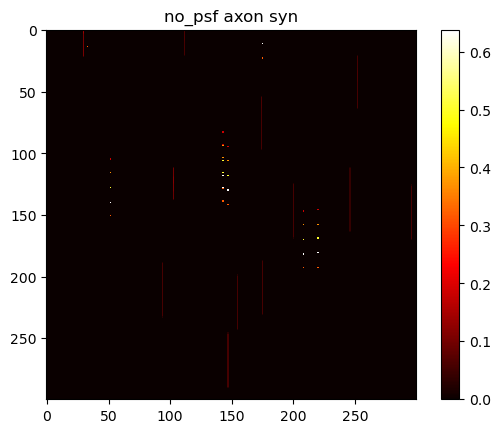

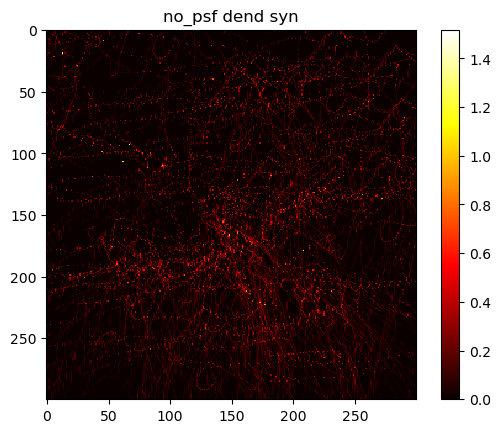

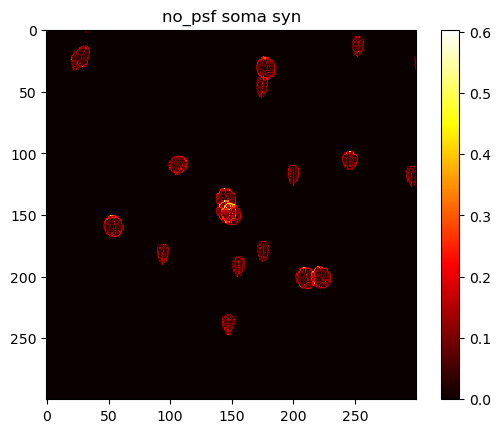

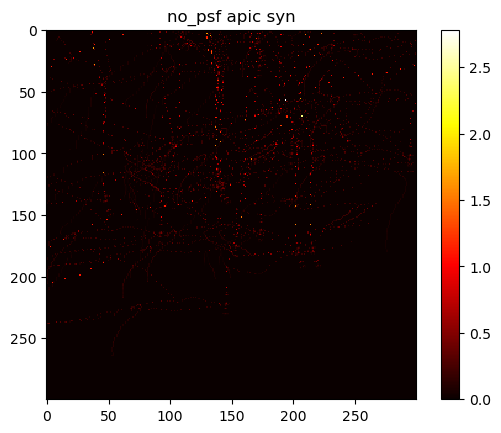

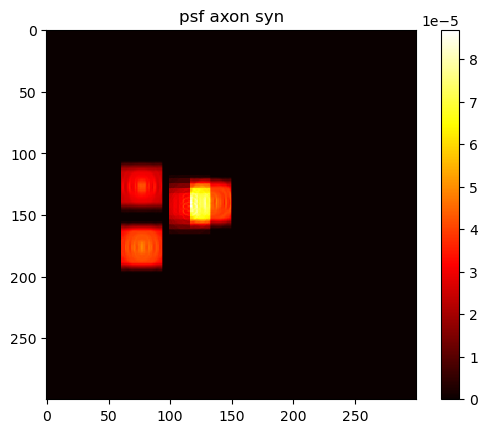

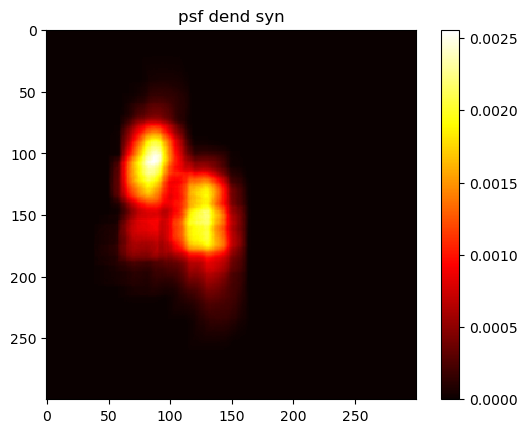

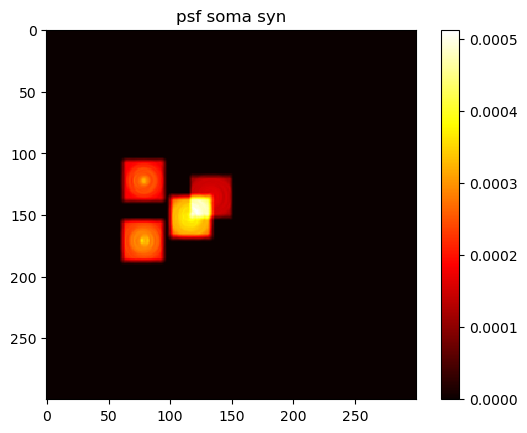

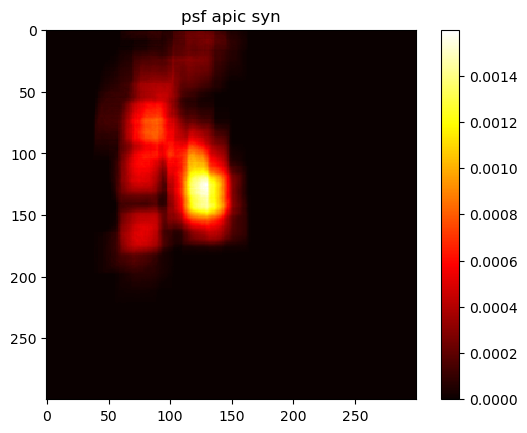

In [ ]:
comparts = ['axon', 'dend', 'soma', 'apic']
all_cells_rec = {
    p: { 
        c: {
            'syn': None,
            'spk': None,
        } for c in comparts
    } for p in ['no_psf', 'psf']
}

time = None
for i_output in output_dir_dict.keys():
    output_dir = output_dir_dict[i_output] + "run" + str(run_id) + "/model_rec_final/"
    for file in os.listdir(output_dir):
        if file.endswith('.npy'):
            # open numpy memmap file 
            file_path = output_dir + file
            print(file_path)
            arr = np.memmap(file_path, dtype='float32', mode='r').reshape(-1, 300, 300)

            # use the file name to determine the compartment and type of data
            # e.g. no_psf_cell_8406-syn_rec_dend.npy
            # e.g. psf_cell_8406-spk_rec_soma.npy
            # e.g. psf_cell_8406-syn_rec_apic.npy

            compart_type = file.split("_")[-1].replace(".npy", "")
            psf_type = file.split("_")[0]
            psf_type = 'no_psf' if psf_type == 'no' else 'psf'
            activity_type = file.split("_")[-3]
            print(activity_type)
            activity_type = activity_type.split("-")[1]
            cell_id = file.split("_")[1].split("-")[0]

            print(compart_type, psf_type, activity_type, cell_id)

            if all_cells_rec[psf_type][compart_type][activity_type] is None:
                all_cells_rec[psf_type][compart_type][activity_type] = \
                    np.zeros(arr.shape, dtype='float32')
            
            all_cells_rec[psf_type][compart_type][activity_type] += arr

# finally, show each of the results in all_cells_rec
for psf_type in all_cells_rec.keys():
    for compart_type in all_cells_rec[psf_type].keys():
        for activity_type in all_cells_rec[psf_type][compart_type].keys():
            arr = all_cells_rec[psf_type][compart_type][activity_type]
            if arr is None:
                continue
            plt.imshow(-arr[0, :, :], cmap='hot', interpolation='nearest')
            plt.colorbar()
            plt.title(f"{psf_type} {compart_type} {activity_type}")
            plt.show()


    

In [13]:
# load time 
# load time
data_dir = 'C:/Users/jjudge3/Desktop/neuron docker/' # /path/to/compressed/data
target_dir = data_dir + 'archive/run' + str(run_id) + "/"
mm_time_fp = target_dir + 'v7_batch1_0_0_time.dat'
time = np.memmap(mm_time_fp, dtype='float32', mode='r')
print(len(time))


501


CREATED MOVIE: no_psf_axon_syn.gif
CREATED MOVIE: no_psf_dend_syn.gif
CREATED MOVIE: no_psf_soma_syn.gif
CREATED MOVIE: no_psf_apic_syn.gif
CREATED MOVIE: psf_axon_syn.gif
CREATED MOVIE: psf_dend_syn.gif
CREATED MOVIE: psf_soma_syn.gif
CREATED MOVIE: psf_apic_syn.gif


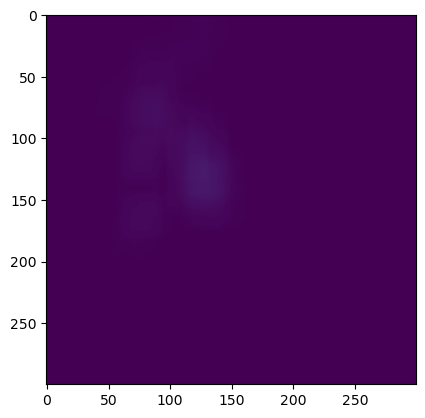

In [16]:
# make each array into an animated gif using Camera.animate_frames_to_video
cam = Camera([], [], time, init_dummy=True)
for psf_type in all_cells_rec.keys():
    for compart_type in all_cells_rec[psf_type].keys():
        for activity_type in all_cells_rec[psf_type][compart_type].keys():
            arr = all_cells_rec[psf_type][compart_type][activity_type]
            gif_filename = f"{psf_type}_{compart_type}_{activity_type}.gif"
            if arr is None:
                continue
            cam.animate_frames_to_video(arr, gif_filename, frames=(0, 501))


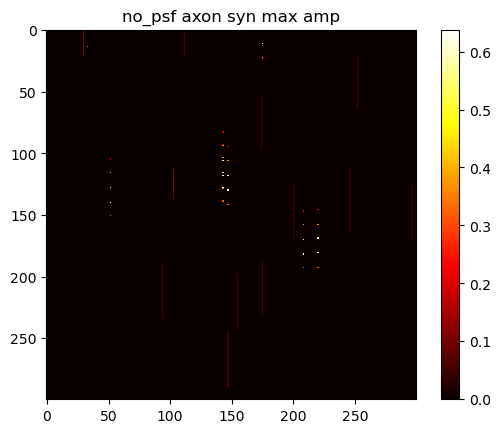

TypeError: bad operand type for unary -: 'NoneType'

In [ ]:
# max amp heatmaps over the time window
cam = Camera([], [], time, init_dummy=True)
for psf_type in all_cells_rec.keys():
    for compart_type in all_cells_rec[psf_type].keys():
        for activity_type in all_cells_rec[psf_type][compart_type].keys():
            arr = all_cells_rec[psf_type][compart_type][activity_type]
            if arr is None:
                continue
            max_amp = np.max(-arr, axis=0)
            plt.imshow(max_amp, cmap='hot', interpolation='nearest')
            plt.colorbar()
            plt.title(f"{psf_type} {compart_type} {activity_type} max amp")
            plt.show()